<a href="https://colab.research.google.com/github/2303a52274/STML-2303A52274/blob/main/stml_project_2274.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STML PROJECT
#NAME: L.SRINIVAS REDDY
#BATCH: 36
#HT.NO: 2303A52274

DATA SET: HEART DISEASE PREDICTION

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv("/content/heart.csv")
print(d.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
X=d.drop('target',axis=1)
mle_params={}
y=d["target"]
print("target:")
print(y.head())
print("shape:",y.shape)
print("features:")
print(X.head())

target:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
shape: (1025,)
features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [ ]:
S=X.replace({'Male':1,'Female':0,'Yes':1,'No':0})
print(S)
Y=y.replace({'Positive':1,'Negative':0})
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(S, Y , test_size=0.2, random_state=30)
print("X_train:",X_train)
print("X_test:",X_test)
print("Y_train:",y_train)
print("Y_train:",y_test)

X_train:      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
579   58    1   0       146   218    0        1      105      0      2.0   
117   43    1   0       120   177    0        0      120      1      2.5   
884   70    1   0       145   174    0        1      125      1      2.6   
61    66    0   2       146   278    0        0      152      0      0.0   
636   59    0   0       174   249    0        1      143      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
140   57    1   0       152   274    0        1       88      1      1.2   
500   71    0   0       112   149    0        1      125      0      1.6   
813   53    1   0       140   203    1        0      155      1      3.1   
941   52    0   2       136   196    0        0      169      0      0.1   
421   42    0   0       102   265    0        0      122      0      0.6   

     slope  ca  thal  
579      1   1     3  
117      1   0     3  
884      

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
lr=LR.fit(X_train,y_train)
print("coefficient:",lr.coef_)
print("intercept:",lr.intercept_)

coefficient: [[ 0.00599157 -1.27941206  0.82762559 -0.01235278 -0.00212402 -0.07543275
   0.48927829  0.0279657  -0.89467585 -0.48341725  0.58586217 -0.77865341
  -0.91540195]]
intercept: [0.08376666]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = lr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.8414634146341463
confusion matrix:
[[307  89]
 [ 41 383]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       396
           1       0.81      0.90      0.85       424

    accuracy                           0.84       820
   macro avg       0.85      0.84      0.84       820
weighted avg       0.85      0.84      0.84       820



In [ ]:
from sklearn.svm import SVC
SV= SVC()
sv=SV.fit(X_train,y_train)
print("intercept:",sv.intercept_)

intercept: [0.37835577]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = sv.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.7097560975609756
confusion matrix:
[[247 149]
 [ 89 335]]
classification report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       396
           1       0.69      0.79      0.74       424

    accuracy                           0.71       820
   macro avg       0.71      0.71      0.71       820
weighted avg       0.71      0.71      0.71       820



In [ ]:
from sklearn.linear_model import Perceptron
PR= Perceptron()
pr=PR.fit(X_train,y_train)
print("intercept:",pr.intercept_)
print("coefficient:",pr.coef_)

intercept: [-47.]
coefficient: [[ -791.   -725.   1864.   -503.   -383.     40.    121.   1630.   -821.
  -1768.1   595.  -1583.  -1171. ]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.6451219512195122
confusion matrix:
[[146 250]
 [ 41 383]]
classification report:
              precision    recall  f1-score   support

           0       0.78      0.37      0.50       396
           1       0.61      0.90      0.72       424

    accuracy                           0.65       820
   macro avg       0.69      0.64      0.61       820
weighted avg       0.69      0.65      0.62       820



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn = KNeighborsClassifier()
KN=kn.fit(X_train,y_train)
y_pred=KN.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("classification_report:",classification_report(y_test,y_pred))

accuracy: 0.7463414634146341
confusion_matrix: [[81 22]
 [30 72]]
classification_report:               precision    recall  f1-score   support

           0       0.73      0.79      0.76       103
           1       0.77      0.71      0.73       102

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC
ss = SVC()
mm=ss.fit(X_train_pca,y_train)
print("intercept:",mm.intercept_)

intercept: [0.03903232]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.7097560975609756


In [ ]:
from sklearn.linear_model import LogisticRegression
ss = LogisticRegression()
mm=ss.fit(X_train_pca,y_train)
print("coefficient:",mm.coef_)
print("intercept:",mm.intercept_)

coefficient: [[-0.00408413  0.04454196 -0.01034264]]
intercept: [0.05980162]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.7


In [ ]:
from sklearn.linear_model import Perceptron
ss = Perceptron()
mm=ss.fit(X_train_pca,y_train)
print("coefficient:",mm.coef_)
print("intercept:",mm.intercept_)

coefficient: [[10.08523878 42.75581305 14.89656196]]
intercept: [18.]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mm.predict(X_train_pca)
print("accuracy:",accuracy_score(y_train, y_pred))

accuracy: 0.65


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ss = KNeighborsClassifier()
mm=ss.fit(X_train_pca,y_train)
y_pred=mm.predict(X_test_pca)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.7560975609756098


In [ ]:
from sklearn.utils import resample

In [ ]:
n_iterations = 10
accuracies_score_svm = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    ss = SVC()
    mm = ss.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = mm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_svm.append(accuracy)
print(accuracies_score_svm)

[0.7219512195121951, 0.7365853658536585, 0.7268292682926829, 0.7414634146341463, 0.7365853658536585, 0.7219512195121951, 0.7219512195121951, 0.7365853658536585, 0.7268292682926829, 0.7268292682926829]


In [ ]:
n_iterations = 10
accuracies_score_per = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    ss = Perceptron()
    mm = ss.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = mm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_per.append(accuracy)
print(accuracies_score_per)

[0.4975609756097561, 0.6, 0.7219512195121951, 0.7414634146341463, 0.5121951219512195, 0.697560975609756, 0.7073170731707317, 0.7317073170731707, 0.5609756097560976, 0.697560975609756]


In [ ]:
n_iterations = 10
accuracies_score_lr = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    lr = LogisticRegression()
    LR = lr.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = LR.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_lr.append(accuracy)
print(accuracies_score_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.8682926829268293, 0.8390243902439024, 0.8585365853658536, 0.848780487804878, 0.8829268292682927, 0.8585365853658536, 0.8731707317073171, 0.8731707317073171, 0.8585365853658536, 0.8439024390243902]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
n_iterations = 10
accuracies_score_knn = []
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(S, Y, replace=True, n_samples=len(S))
    kn = KNeighborsClassifier()
    KN = kn.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = KN.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_score_knn.append(accuracy)
print(accuracies_score_knn)

[0.8878048780487805, 0.848780487804878, 0.8682926829268293, 0.8585365853658536, 0.8878048780487805, 0.8439024390243902, 0.8731707317073171, 0.8341463414634146, 0.8439024390243902, 0.9024390243902439]


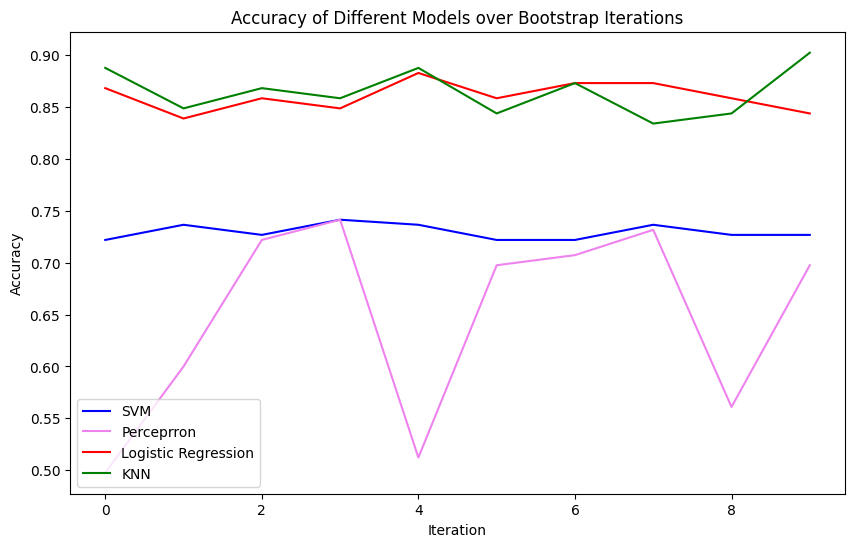

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( accuracies_score_svm, color='blue', label='SVM')
plt.plot(accuracies_score_per,color='violet',label='Perceprron')
plt.plot(accuracies_score_lr, color='red', label='Logistic Regression')
plt.plot(accuracies_score_knn, color='green', label='KNN')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models over Bootstrap Iterations')
plt.legend()
plt.show()